**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

**DATA COLLECTION AND CLEANING**

In [ ]:
# Load the Forest Cover Type dataset
data = fetch_covtype()
# Convert data and target into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add the target variable to the DataFrame
df['CoverType'] = data.target


In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,CoverType
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
df['CoverType'] = df['CoverType'] - 1

In [ ]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype(int)

In [ ]:
df.shape

(581012, 55)

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,CoverType
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,1.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_0                   581012 non-null  int64
 11  Wilderness_Area_1                   581012 non-null 

In [ ]:
df.CoverType.value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: CoverType, dtype: int64

**EXPLORATORY DATA ANALYSIS**

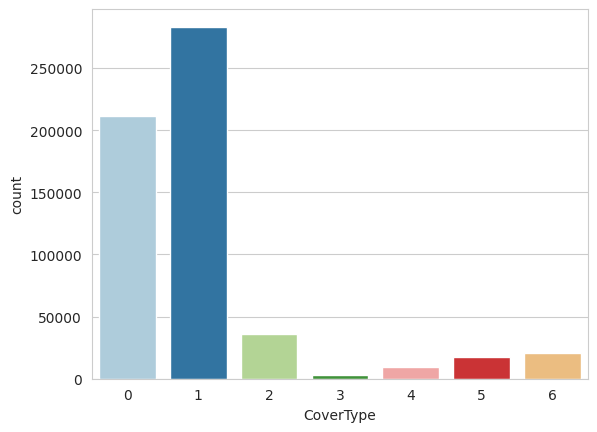

In [ ]:
sns.countplot(x='CoverType', data=df, palette='Paired')
plt.show()

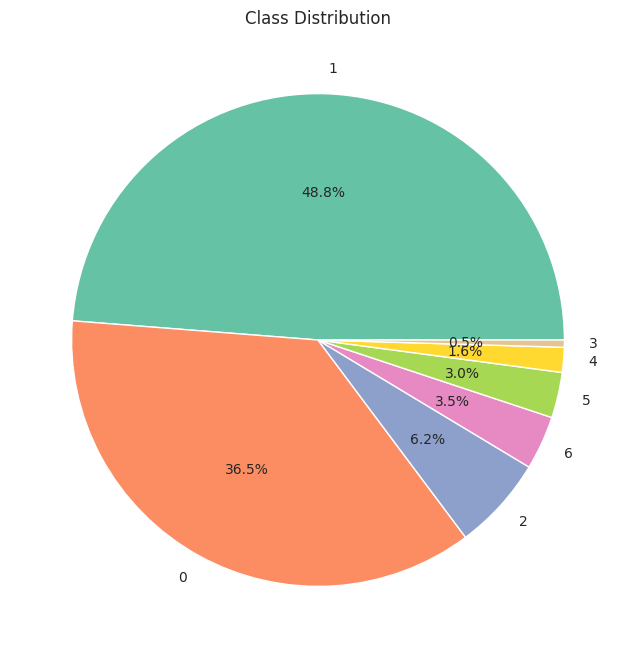

In [ ]:
cmap = sns.color_palette('Set2', as_cmap=True)(np.arange(7))

plt.figure(figsize=(8, 8))
plt.pie(
    df['CoverType'].value_counts().values,
    colors=cmap,
    labels=df['CoverType'].value_counts().keys(),
    autopct='%.1f%%'
)
plt.title("Class Distribution")
plt.show()

## **TASK:**
Plot the number of Observations of Soil Type  and find which type has the highest number records

In [ ]:
# Your code here



## **TASK:**
Check for Duplicate rows and drop if any are found

In [ ]:
# Your code here



**DATA SPLITTING**

In [ ]:
def split_and_scale(df):
    df = df.copy()

    # Split df into X and y
    y = df['CoverType'].copy()
    X = df.drop('CoverType', axis=1).copy()

    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [ ]:
def evaluate_model(model, class_balance, X_test, y_test):

    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n----------------------\n", clr)

In [ ]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0

    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
# loop through all columns to see if there are any outliers
for column in df.columns:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points
There are 29884 outliers in Wilderness_Area_1
There are 36968 outliers in Wilderness_Area_3
There are 3031 outliers in Soil_Type_0
There are 7525 outliers in Soil_Type_1
There are 4823 outliers in Soil_Type_2
There are 12396 outliers in Soil_Type_3
There are 1597 outliers in Soil_Type_4
There are 6575 outliers in Soil_Type_5
There are 105 outliers in Soil_Type_6
There are 179 outliers in Soil_Type_7
There are 1147 outliers in Soil_Type_8
There are 32634 outliers in Soil_Type_9
There are 12410 outliers in Soil_Type_10
There are 29971 outliers in Soil_Type_11
There are 17431 outliers in Soil_Type_12
There are 599 outliers in Soil_Type_13
There are 3 outliers in Soil_Type_14
There are 2845 outliers in 

In [ ]:
imbalanced_df = df.copy()
X_train, X_test, y_train, y_test = split_and_scale(imbalanced_df)

**MODE TRAINING AND EVALUATION**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Imbalanced Data): 72.44%


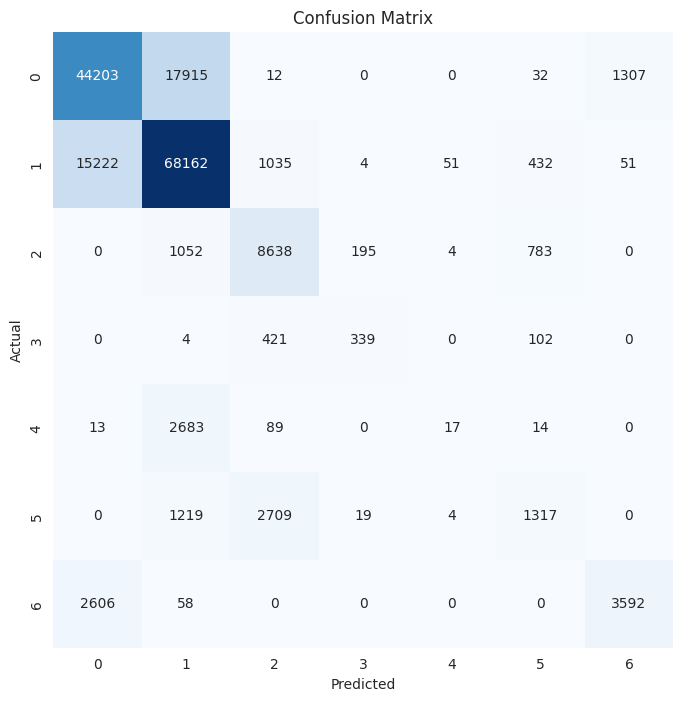

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.71      0.70      0.70     63469
           1       0.75      0.80      0.77     84957
           2       0.67      0.81      0.73     10672
           3       0.61      0.39      0.48       866
           4       0.22      0.01      0.01      2816
           5       0.49      0.25      0.33      5268
           6       0.73      0.57      0.64      6256

    accuracy                           0.72    174304
   macro avg       0.60      0.50      0.52    174304
weighted avg       0.71      0.72      0.71    174304



In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

evaluate_model(model1, "Imbalanced Data", X_test, y_test)

In [ ]:
undersampled_df = df.copy()

In [ ]:
undersampled_df['CoverType'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: CoverType, dtype: int64

In [ ]:
min_class_size = np.min(undersampled_df['CoverType'].value_counts().values)

print("Size of smallest class:", min_class_size)

Size of smallest class: 2747


In [ ]:
# Undersampling the majority classes
class_subsets = [undersampled_df.query("CoverType == " + str(i)) for i in range(7)]

for i in range(7):
    class_subsets[i] = class_subsets[i].sample(min_class_size, replace=False, random_state=123)

undersampled_df = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [ ]:
undersampled_df.CoverType.value_counts()

6    2747
0    2747
2    2747
4    2747
1    2747
3    2747
5    2747
Name: CoverType, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = split_and_scale(undersampled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Undersampled Data): 70.84%


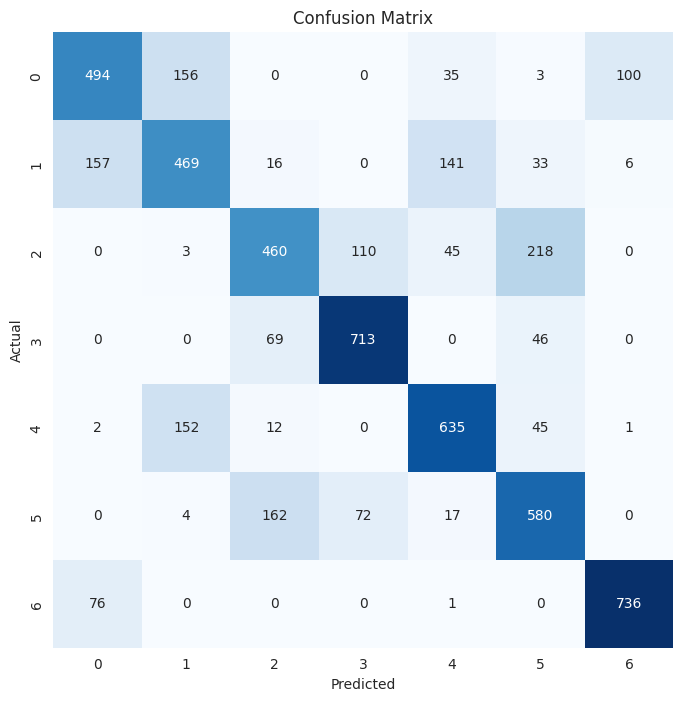

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       788
           1       0.60      0.57      0.58       822
           2       0.64      0.55      0.59       836
           3       0.80      0.86      0.83       828
           4       0.73      0.75      0.74       847
           5       0.63      0.69      0.66       835
           6       0.87      0.91      0.89       813

    accuracy                           0.71      5769
   macro avg       0.71      0.71      0.71      5769
weighted avg       0.71      0.71      0.71      5769



In [ ]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

evaluate_model(model2, "Undersampled Data", X_test, y_test)

## **TASKS:**
1. Plot the correlation Matrix for the features
2. Select Top 20 important features, retrain the model and verify how the model performs

In [ ]:
# Your code here



In [ ]:
oversampled_df = df.copy()

In [ ]:
max_class_size = np.max(oversampled_df['CoverType'].value_counts().values)
print("Size of largest class:", max_class_size)

Size of largest class: 283301


In [ ]:
# Oversampling the minority classes
class_subsets = [oversampled_df.query("CoverType == " + str(i)) for i in range(7)]

for i in range(7):
    class_subsets[i] = class_subsets[i].sample(max_class_size, replace=True, random_state=123)

oversampled_df = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [ ]:
oversampled_df['CoverType'].value_counts()

6    283301
0    283301
1    283301
2    283301
4    283301
3    283301
5    283301
Name: CoverType, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = split_and_scale(oversampled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Oversampled Data): 70.70%


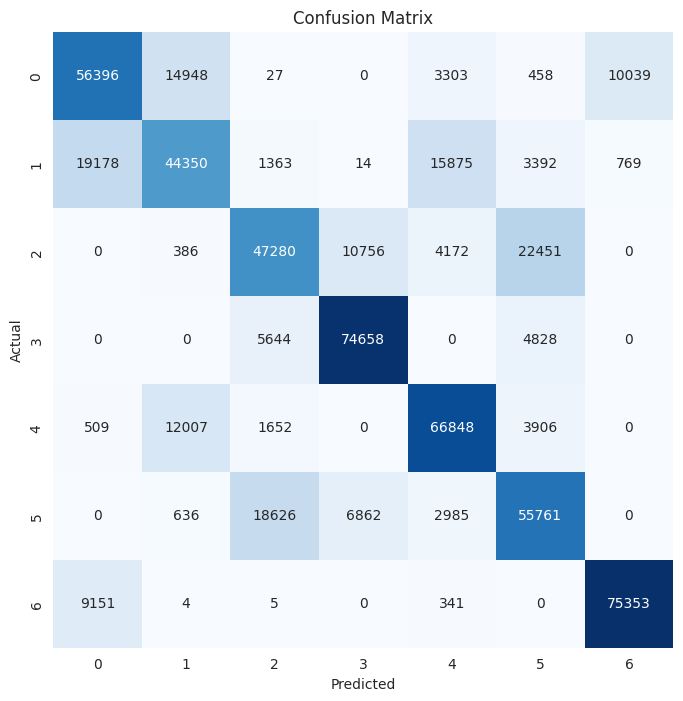

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     85171
           1       0.61      0.52      0.56     84941
           2       0.63      0.56      0.59     85045
           3       0.81      0.88      0.84     85130
           4       0.71      0.79      0.75     84922
           5       0.61      0.66      0.63     84870
           6       0.87      0.89      0.88     84854

    accuracy                           0.71    594933
   macro avg       0.70      0.71      0.70    594933
weighted avg       0.70      0.71      0.70    594933



In [ ]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

evaluate_model(model3, "Oversampled Data", X_test, y_test)

## **TASKS:**
1. Fit the Random Forest Model
2. Find the Best Estimator Parameters

In [ ]:
# Your code here



## **TASKS:**
Plot the Learning Curves
1. Training Score
2. Cross Validation Score

In [ ]:
# Your code here

